In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')
plt.style.use('ggplot')

In [2]:
import os
os.getcwd()

'/Users/ameneh'

In [3]:
os.chdir('/Users/ameneh/downloads')

In [7]:
df = pd.read_csv('wdbc.data', sep='\s+'#if header=None includes in command, shown data types are OBJECT!
,header=None)
df.head()

,0
0,"842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,..."
1,"842517,M,20.57,17.77,132.9,1326,0.08474,0.0786..."
2,"84300903,M,19.69,21.25,130,1203,0.1096,0.1599,..."
3,"84348301,M,11.42,20.38,77.58,386.1,0.1425,0.28..."
4,"84358402,M,20.29,14.34,135.1,1297,0.1003,0.132..."


In [16]:
df.tail()#give the five bottom rows

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE    442 non-null int64
SEX    442 non-null int64
BMI    442 non-null float64
BP     442 non-null float64
S1     442 non-null int64
S2     442 non-null float64
S3     442 non-null float64
S4     442 non-null float64
S5     442 non-null float64
S6     442 non-null int64
Y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [18]:
df_number = df.select_dtypes(include = ['float64', 'int64'])#for double checking if data type are numeric
df_number.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


there is some sudden increase in S1


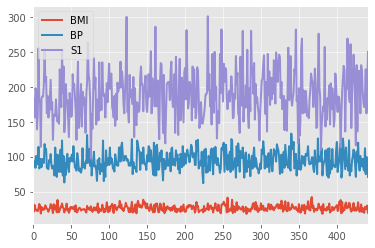

In [19]:
#firstly, check to see if there is any anomalies in each column
df[['BMI', 'BP','S1']].plot(kind='line') 
print('there is some sudden increase in S1')

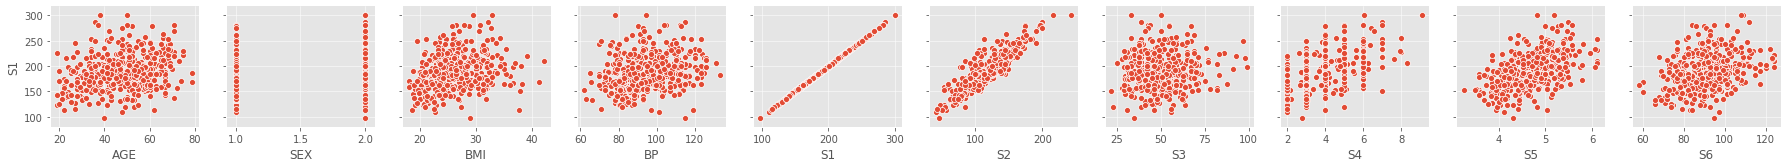

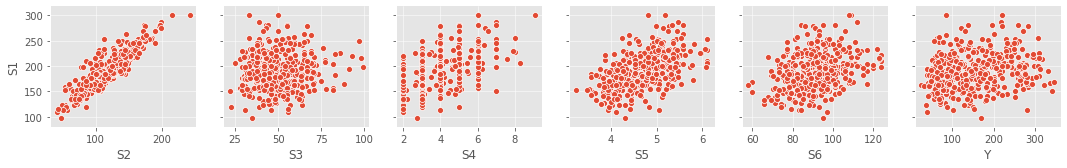

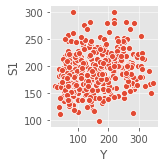

In [20]:
#let's look at its scatter plot
for i in range(0, len(df_number.columns),5):
    sns.pairplot(data=df_number,
                x_vars=df_number.columns[i:i+10],
                y_vars=['S1'])

there is some sudden increase in s2


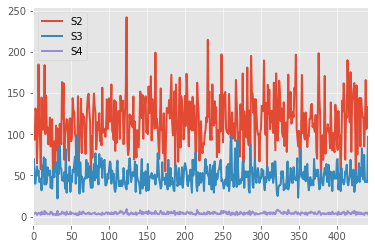

In [21]:
#continue checking
df2=df[['S2','S3','S4']].plot(kind='line')
print('there is some sudden increase in s2')

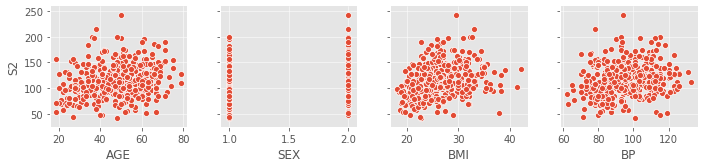

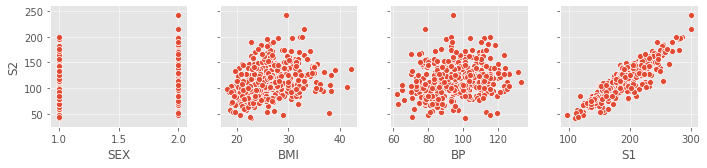

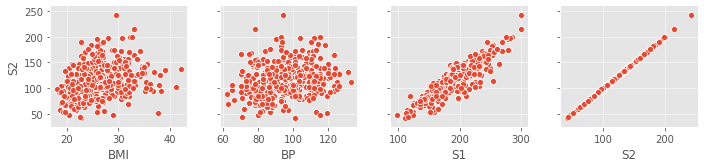

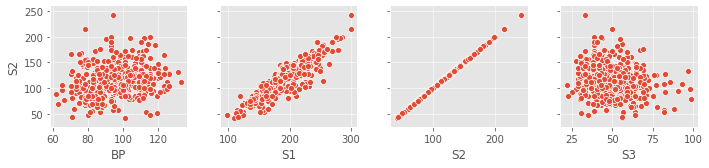

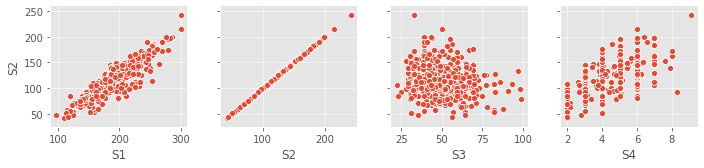

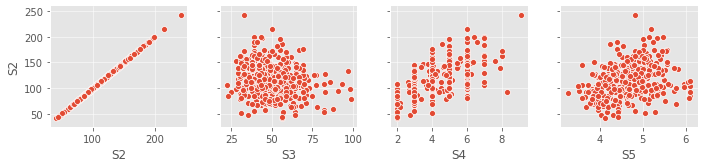

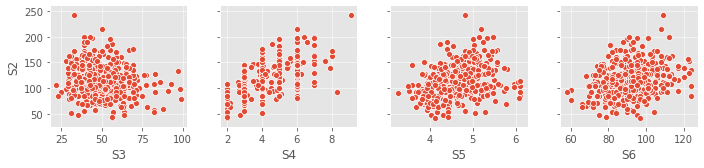

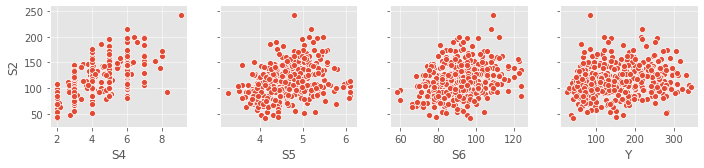

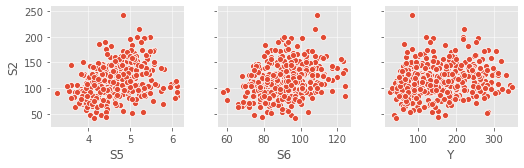

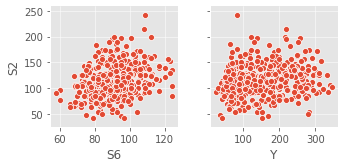

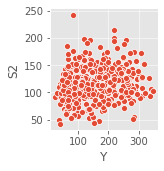

In [22]:
# plot S2 column versus whole columns side by side 
for i in range(0, len(df_number.columns)):
    sns.pairplot(data=df_number,
                x_vars=df_number.columns[i:i+4],
                y_vars=['S2'])

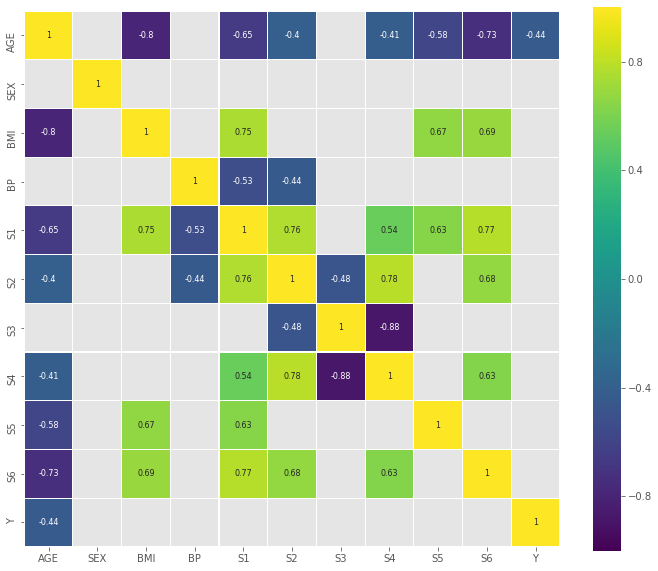

In [23]:
#let's focus on S2 as it has sudden change 
df_s2 = df.sort_values(['S2'], ascending=False,axis=0)# what is its top10?
df_top10= df_s2.head(10)
df_cor_top10=df_top10.corr()#investigate s2 top10 strong correlation with other columns
plt.figure(figsize=(12, 10))

sns.heatmap(df_cor_top10[(df_cor_top10 >= 0.5) | (df_cor_top10 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)



no meaningful!!


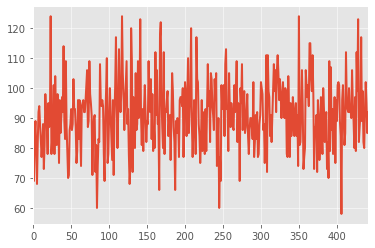

In [24]:
#again checking
df3=df['S6'].plot(kind='line')
print('no meaningful!!')

no meaningful!!


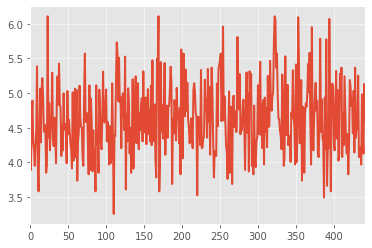

In [25]:
df4=df['S5'].plot(kind='line')
print('no meaningful!!')

no meaningful!!


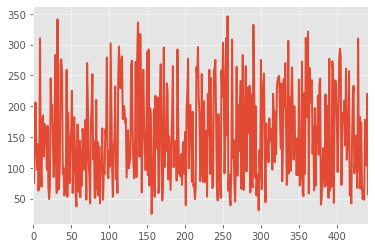

In [26]:
df5=df['Y'].plot(kind='line')
print('no meaningful!!')

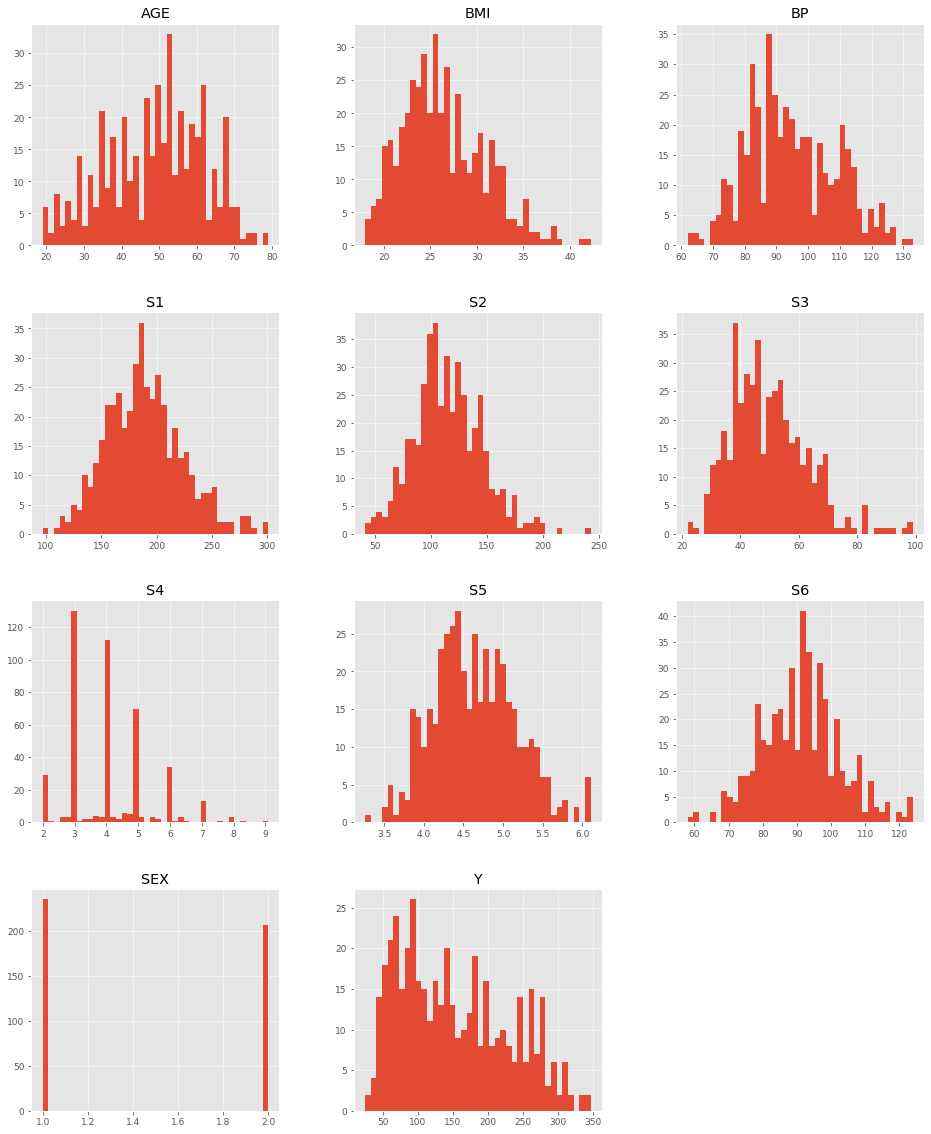

In [27]:
# secondly, histogram of all column in one glance to check their distribution and see which columns are resemble 
#to eachother
df_number.hist(figsize=(16, 20), bins=40, xlabelsize=9, ylabelsize=9); 

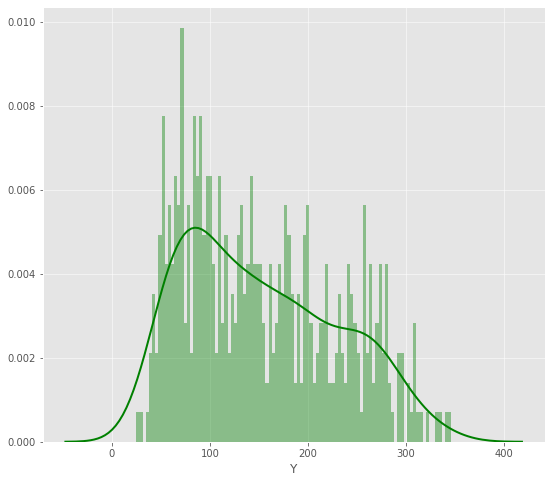

In [28]:
# Std of column Y is too big. let's look at it
plt.figure(figsize=(9, 8))
sns.distplot(df['Y'], color='g', bins=100, hist_kws={'alpha': 0.4});#distirbuted diagram of Y column to check if 
#it has outlier?

population are mostly 45<age<65


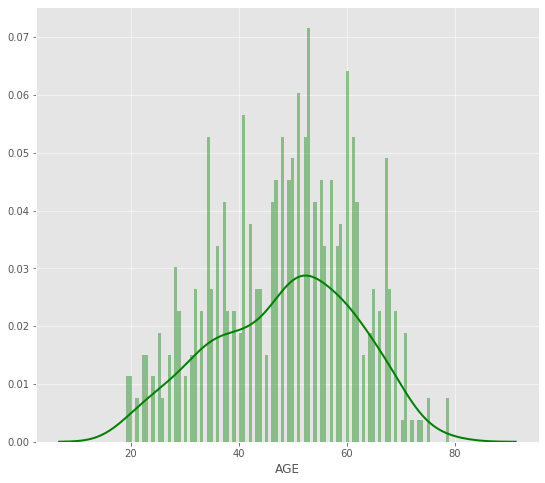

In [29]:
plt.figure(figsize=(9, 8))
sns.distplot(df['AGE'], color='g', bins=100, hist_kws={'alpha': 0.4});#distirbuted diagram of AGE column, 
print('population are mostly 45<age<65')

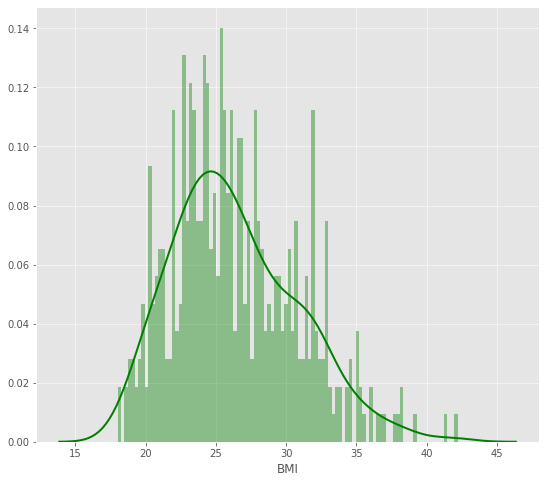

In [30]:
plt.figure(figsize=(9, 8))
sns.distplot(df['BMI'], color='g', bins=100, hist_kws={'alpha': 0.4});#distirbuted diagram of BMI column

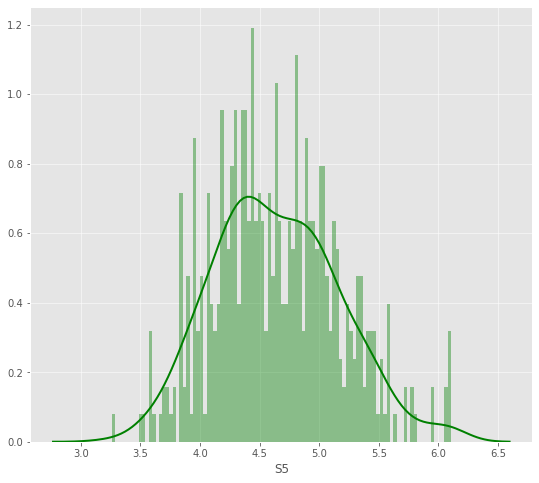

In [31]:
plt.figure(figsize=(9, 8))
sns.distplot(df['S5'], color='g', bins=100, hist_kws={'alpha': 0.4});#distirbuted diagram of S5 column
print('')

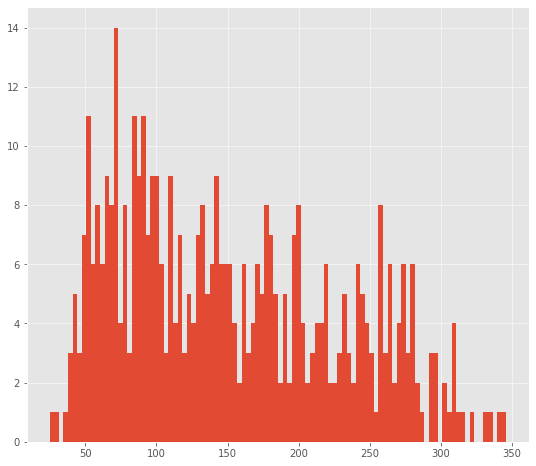

In [32]:
#here I just want to answer my own question which is 
#has distribution command and histogram command the same result for each column, for example column Y?
df['Y'].hist(figsize=(9, 8), bins=100)

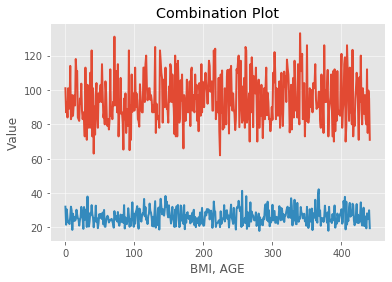

In [33]:
#now evaluate those histogram which their histogram looks like eachother
#BMI and BP in one plot as they sound to have the same histogram
plt.plot(df['BP'])
plt.plot(df['BMI'])
plt.title('Combination Plot')
plt.xlabel('BMI, AGE')
plt.ylabel('Value')

plt.show()

plt.close()

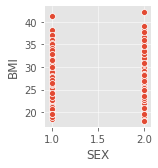

In [34]:
# column BMI versus SEX
sns.pairplot(data=df_number,
                x_vars=['SEX'],
                y_vars=['BMI'])

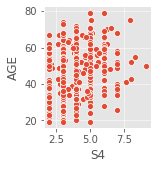

In [35]:
# column AGE versus S4
sns.pairplot(data=df_number,
                x_vars=['S4'],
                y_vars=['AGE'])

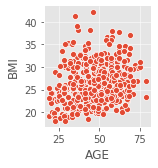

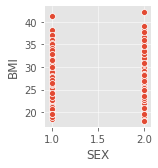

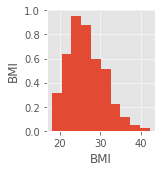

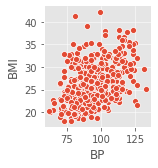

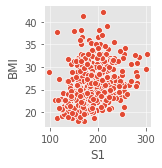

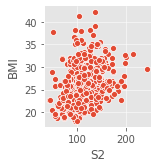

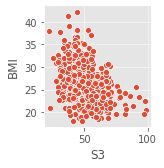

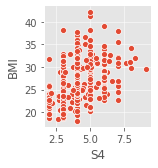

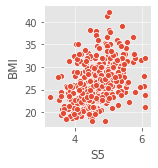

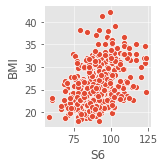

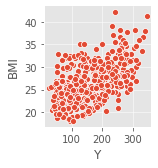

In [10]:
#scatter plot of all column, {notice BMI versus BMI plot}
for i in range(0, len(df_number.columns)):
    sns.pairplot(data=df_number,
                x_vars=df_number.columns[i],
                y_vars=['BMI'])

In [ ]:
# plot SEX column versus whole columns side by side 
for i in range(0, len(df_number.columns)):
    sns.pairplot(data=df_number,
                x_vars=df_number.columns[i:i+4],
                y_vars=['BP'])

In [ ]:
df_number_corr = df_number.corr() 
print(df_number_corr)

In [ ]:
df_number_corr = df_number.corr()
plt.matshow(df_number_corr)
plt.show()
#fig, ax=sns.pairplot(df_number_corr)

In [41]:
# BMI strong correlation 
df_number_corr = df_number.corr()['BMI'] 
strong_features = df_number_corr[abs(df_number_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with BMI:\n{}".format(len(strong_features), strong_features))

There is 2 strongly correlated values with BMI:
BMI    1.00000
Y      0.58645
Name: BMI, dtype: float64


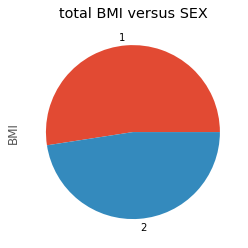

In [40]:
# BMI vs SEX
df_sex = df.groupby('SEX',axis=0).sum()
df_sex['BMI'].plot(kind='pie')
plt.title('total BMI versus SEX')
plt.show()

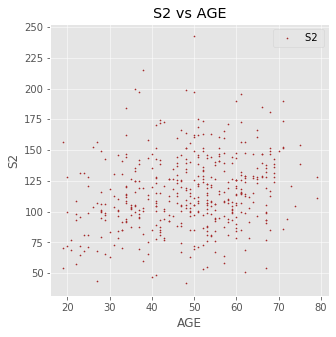

In [39]:
#S2 vs AGE
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(df['AGE'], df['S2'], s=2, label='S2 ', color='brown', marker='*')
axes.set_title('S2 vs AGE')
axes.set_xlabel('AGE')
axes.set_ylabel('S2')
axes.legend()

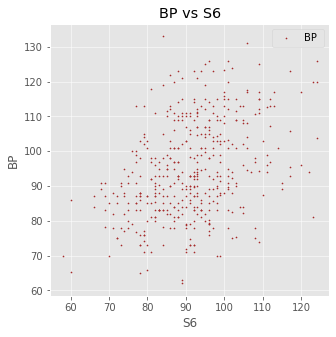

In [38]:
#S6 vs SEX
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(df['S6'], df['BP'], s=2, label='BP ', color='brown', marker='*')
axes.set_title('BP vs S6')
axes.set_xlabel('S6')
axes.set_ylabel('BP')
axes.legend()

In [ ]:
#Advanced 
#Create two box plots to compare the fares of male and female with whiskers 
df_train = pd.read_csv('train_titanic.csv')
df.head()

In [42]:

df33=df_train[['Fare', 'Sex']] 
df4=df33.groupby('Sex',axis=0)
print(df4)
df4.plot(kind='box')
plt.title('boxplot of fare based on female and male ')
plt.ylabel('sex basis')



NameError: name 'df_train' is not defined